# 数据分析

案例一主要是基于“中国人民共和国地市级党委书记数据库(2000-2010) ”数据进行数据挖掘，该数据库由复旦大学经济学院陈硕副教授及其团队(Fudan WTF Social Science Lab)成员整理，主要研究问题如下：

1、性别构成

2、年龄情况、专业情况

3、任期情况

课程技术点：
数据读取及查看 / 数据清洗 / 数据分析 / 图表制作

参考文章：
《如何成为一位市委书记？》，链接：http://mp.weixin.qq.com/s/K09ybCQGoGzf_ckDGYMfmA


## Pandas CSV数据加载

numpy：科学计算工具包

pandas：数据分析工具包

malplotlib：图表绘制工具包

In [22]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('地市级党委书记数据库（2000-10）.csv',encoding='gbk')
print(data)

OSError: Initializing from file failed

## 报错 OSError: Initializing from file failed

pandas.read_csv() 报错 OSError: Initializing from file failed，一般由两种情况引起：一种是函数参数为路径而非文件名称，另一种是函数参数带有中文。

对于第一种情况很简单，原因就是没有把文件名称放到路径的后面，把文件名称添加到路径后面就可以了。还可以在代码中把文件夹切换到目标文件所在文件夹，过程太繁杂，不喜欢也不推荐，所以就不做展示了。 
第二种情况，即使路径、文件名都完整，还是报错的原因是这个参数中有中文，但是Python3不是已经支持中文了吗？参考了错误原因和pandas的源码，发现调用pandas的read_csv()方法时，默认使用C engine作为parser engine，而当文件名中含有中文的时候，用C engine在部分情况下就会出错。所以在调用read_csv()方法时指定engine为Python就可以解决问题了。

`da4=pd.read_csv('F:\\数据源\\工程清单.csv',engine='python')`

对于第二种情况还有另外一种解决方法，就是使员工open函数打开文件，再取访问里面的数据：

`da3=pd.read_csv(open('F:\\4.0 居配工程监测\\2.0 数据源\\02.南京新居配工程清单.csv'))`


好了这个报错的原因都了解了，解决方法也很简单粗暴，是不是很简短简单！


In [23]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('地市级党委书记数据库（2000-10）.csv',encoding='gbk',engine='python')
print(data)

      省级政区代码    省级政区名称  地市级政区代码   地市级政区名称    年份 党委书记姓名  出生年份  出生月份  籍贯省份代码  \
0     130000       河北省   130100      石家庄市  2000    陈来立   NaN   NaN     NaN   
1     130000       河北省   130100      石家庄市  2001    吴振华   NaN   NaN     NaN   
2     130000       河北省   130100      石家庄市  2002    吴振华   NaN   NaN     NaN   
3     130000       河北省   130100      石家庄市  2003    吴振华   NaN   NaN     NaN   
4     130000       河北省   130100      石家庄市  2004    吴振华   NaN   NaN     NaN   
5     130000       河北省   130100      石家庄市  2005    吴振华   NaN   NaN     NaN   
6     130000       河北省   130100      石家庄市  2006    吴振华   NaN   NaN     NaN   
7     130000       河北省   130100      石家庄市  2007    吴显国   NaN   NaN     NaN   
8     130000       河北省   130100      石家庄市  2008    吴显国   NaN   NaN     NaN   
9     130000       河北省   130100      石家庄市  2009     车俊   NaN   NaN     NaN   
10    130000       河北省   130100      石家庄市  2010    孙瑞彬   NaN   NaN     NaN   
11    130000       河北省   130200       唐山市  2000    白润璋   NaN   N

## Pandas CSV数据查看

### 按行查看

In [13]:
print(data.head()) # 默认5行
print(data.head(10))# 前10行
print(data[0:6]) # 1-6行 
print(data.loc[4]) # 第4行  显示格式不一样

   省级政区代码 省级政区名称  地市级政区代码 地市级政区名称    年份 党委书记姓名  出生年份  出生月份  籍贯省份代码 籍贯省份名称  \
0  130000    河北省   130100    石家庄市  2000    陈来立   NaN   NaN     NaN    NaN   
1  130000    河北省   130100    石家庄市  2001    吴振华   NaN   NaN     NaN    NaN   
2  130000    河北省   130100    石家庄市  2002    吴振华   NaN   NaN     NaN    NaN   
3  130000    河北省   130100    石家庄市  2003    吴振华   NaN   NaN     NaN    NaN   
4  130000    河北省   130100    石家庄市  2004    吴振华   NaN   NaN     NaN    NaN   

   ...    民族  教育 是否是党校教育（是=1，否=0） 专业：人文 专业：社科  专业：理工  专业：农科  专业：医科  入党年份  工作年份  
0  ...   NaN  硕士              1.0   NaN   NaN    NaN    NaN    NaN   NaN   NaN  
1  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  
2  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  
3  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  
4  ...   NaN  本科              0.0   0.0   0.0    1.0    0.0    0.0   NaN   NaN  

[5 rows x 23 columns]
   省级政区代码 省级政区名称  地市级政区代码 地市

### 按字段查看

In [15]:
print(data['年份']) # 一个字段
print(data[['党委书记姓名','年份']]) # 两个字段

0       2000
1       2001
2       2002
3       2003
4       2004
5       2005
6       2006
7       2007
8       2008
9       2009
10      2010
11      2000
12      2001
13      2002
14      2003
15      2004
16      2005
17      2006
18      2007
19      2008
20      2009
21      2010
22      2000
23      2001
24      2002
25      2003
26      2004
27      2005
28      2006
29      2007
        ... 
3633    2003
3634    2004
3635    2005
3636    2006
3637    2007
3638    2008
3639    2009
3640    2010
3641    2000
3642    2001
3643    2002
3644    2003
3645    2004
3646    2005
3647    2006
3648    2007
3649    2008
3650    2009
3651    2010
3652    2000
3653    2001
3654    2002
3655    2003
3656    2004
3657    2005
3658    2006
3659    2007
3660    2008
3661    2009
3662    2010
Name: 年份, Length: 3663, dtype: int64
     党委书记姓名    年份
0       陈来立  2000
1       吴振华  2001
2       吴振华  2002
3       吴振华  2003
4       吴振华  2004
5       吴振华  2005
6       吴振华  2006
7       吴显国  2007
8       

### 数据的所有字段

In [16]:
fields = data.columns.tolist()
print(fields)

['省级政区代码', '省级政区名称', '地市级政区代码', '地市级政区名称', '年份', '党委书记姓名', '出生年份', '出生月份', '籍贯省份代码', '籍贯省份名称', '籍贯地市代码', '籍贯地市名称', '性别', '民族', '教育', '是否是党校教育（是=1，否=0）', '专业：人文', '专业：社科', '专业：理工', '专业：农科', '专业：医科', '入党年份', '工作年份']


### 数据基本信息

describe()返回基本数据信息,会过滤掉缺失值

默认只统计数值类型的字段内容，count计数，mean平均数，std方差，min最小值，四分位数，max 最大值（剔除字符串数据）

若字符串数据会报错，可用 describe(include=[np.number])只统计数值类型

describe(include=[np.object])
这里代表只统计字符串类型的字段内容：count计数，unique唯一值数量，top出现频率最高的内容，freq最高出现频率

In [28]:
print(data.describe())
print(data.describe(include=[np.object]))
#print(data.describe(include=[np.number]))

              省级政区代码        地市级政区代码           年份         出生年份         出生月份  \
count    3663.000000    3663.000000  3663.000000  2676.000000  2645.000000   
mean   403393.393393  404456.756757  2005.000000  1953.622571     6.790548   
std    148176.721620  148485.810327     3.162709     4.416316     3.614664   
min    130000.000000  130100.000000  2000.000000  1941.000000     1.000000   
25%    330000.000000  330100.000000  2002.000000  1951.000000     3.000000   
50%    420000.000000  420200.000000  2005.000000  1954.000000     7.000000   
75%    510000.000000  513400.000000  2008.000000  1956.000000    10.000000   
max    650000.000000  654300.000000  2010.000000  1966.000000    14.000000   

              籍贯省份代码         籍贯地市代码  是否是党校教育（是=1，否=0）        专业：人文  \
count    2624.000000    2615.000000       2493.000000  2370.000000   
mean   364428.353659  365742.332696          0.430405     0.275527   
std    126267.485520  125961.993399          0.576136     0.446874   
min    110000.000

## 问题一 性别构成

### 市委书记性别比例

data.notnull() 去除缺失值

In [48]:
data_gender = data['性别'] # 全部打印出来 包括缺失值
print(data_gender)
data_gender_notnull = data_gender[data_gender.notnull()] # 打印出来不含缺失值的数据 
print(data_gender_notnull)
print('包含缺失值的长度',len(data_gender))
print('过滤掉缺失值的长度\n',data_gender_notnull.describe()) # describe()会过滤掉缺失值
print('',data_gender_notnull.unique()) # .unique()表示显示数据的唯一值内容
count_all = len(data_gender_notnull)
count_m = len(data_gender_notnull[data_gender_notnull == '男'])
count_w = len(data_gender_notnull[data_gender_notnull == '女'])
rate_m = count_m/count_all*100
rate_w = count_w/count_all*100
print('样本量:{}\n男性样本量:{}\n女性样本量:{}\n男性比例:{:.2f}\n女性比例:{:.2f}'.format(count_all,count_m,count_w,rate_m,rate_w))

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
3633    NaN
3634    NaN
3635    NaN
3636    NaN
3637    NaN
3638    NaN
3639    NaN
3640    NaN
3641    NaN
3642    NaN
3643    NaN
3644    NaN
3645    NaN
3646    NaN
3647    NaN
3648    NaN
3649    NaN
3650    NaN
3651    NaN
3652    NaN
3653    NaN
3654    NaN
3655    NaN
3656    NaN
3657    NaN
3658    NaN
3659    NaN
3660    NaN
3661    NaN
3662    NaN
Name: 性别, Length: 3663, dtype: object
121     男
122     男
123     男
124     男
125     男
126     男
127     男
128     男
129     男
130     男
131     男
132     男
133     男
134     男
135     男
136     男
137     男
138     男
139     男
140     男
141     男
142     男
143     男


###  pd.crosstab 统计

按照省份统计出男女人数

crosstab(行，列)用于针对字符串数据的透视（类似excel的数据透视）

In [53]:
# 按省份分析市委书记女性比例

data_prov_gender = data[['省级政区名称','性别']][data['性别'].notnull()] # 去除缺失值
print(data_prov_gender.head())

pt = pd.crosstab(data_prov_gender['省级政区名称'],data_prov_gender['性别'])
print(pt)
pt_reverse = pd.crosstab(data_prov_gender['性别'],data_prov_gender['省级政区名称'])
print(pt_reverse )

    省级政区名称 性别
121    山西省  男
122    山西省  男
123    山西省  男
124    山西省  男
125    山西省  男
性别         女    男
省级政区名称           
云南省        2   73
内蒙古自治区     0   86
吉林省        4   72
四川省        8  155
宁夏回族自治区    0   49
安徽省        7  167
山东省        6  178
山西省        6  112
广东省        5  212
广西壮族自治区    0  122
新疆维吾尔自治区   0   21
江苏省        3  129
江西省        4  113
河南省        1  182
浙江省        3  114
海南省        0   22
湖北省        0  123
湖南省        1  126
甘肃省        0  109
福建省        3   96
贵州省        0   36
辽宁省       13  121
陕西省        9   93
青海省        0   11
黑龙江省       0  111
省级政区名称  云南省  内蒙古自治区  吉林省  四川省  宁夏回族自治区  安徽省  山东省  山西省  广东省  广西壮族自治区  ...   \
性别                                                                   ...    
女         2       0    4    8        0    7    6    6    5        0  ...    
男        73      86   72  155       49  167  178  112  212      122  ...    

省级政区名称  海南省  湖北省  湖南省  甘肃省  福建省  贵州省  辽宁省  陕西省  青海省  黑龙江省  
性别                                                         
女

### 增加统计字段 & 排序

计算出女性占比

这里直接在pt数据中添加了一个新的字段“女性占比”

`pt.sort_values()` 排序，ascending = False表示降序

`pt2.index[:10]`  代表对应序列

In [61]:
pt['女性占比'] = pt['女']/(pt['女']+pt['男'])
print(pt)
pt2 = pt.sort_values(by = ['女性占比'], ascending = False)
print(pt2)
print(pt2.index[:10])

性别         女    男      女性占比
省级政区名称                     
云南省        2   73  0.026667
内蒙古自治区     0   86  0.000000
吉林省        4   72  0.052632
四川省        8  155  0.049080
宁夏回族自治区    0   49  0.000000
安徽省        7  167  0.040230
山东省        6  178  0.032609
山西省        6  112  0.050847
广东省        5  212  0.023041
广西壮族自治区    0  122  0.000000
新疆维吾尔自治区   0   21  0.000000
江苏省        3  129  0.022727
江西省        4  113  0.034188
河南省        1  182  0.005464
浙江省        3  114  0.025641
海南省        0   22  0.000000
湖北省        0  123  0.000000
湖南省        1  126  0.007874
甘肃省        0  109  0.000000
福建省        3   96  0.030303
贵州省        0   36  0.000000
辽宁省       13  121  0.097015
陕西省        9   93  0.088235
青海省        0   11  0.000000
黑龙江省       0  111  0.000000
性别         女    男      女性占比
省级政区名称                     
辽宁省       13  121  0.097015
陕西省        9   93  0.088235
吉林省        4   72  0.052632
山西省        6  112  0.050847
四川省        8  155  0.049080
安徽省        7  167  0.040230
江西省        4  113  0

### 绘制图表1：不同省份女性市委书记占比

创建一个图表，大小为8*4
`plt.figure(figsize=(8,4))`

图标标题
`plt.title('')`

显示图标
`plt.show()`

建立柱状图 
`plt.bar()` 

参数 range(10) 代表横坐标生成10个柱状 

参数 `pt2['女性占比'][:10]` 代表纵坐标

参数 tick_label  横轴标签

参数 color 柱状 颜色

matplotlib颜色表
https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
  
plt.xlabel('')  横坐标

plt.ylabel('') 纵坐标

plt.show()：显示图表

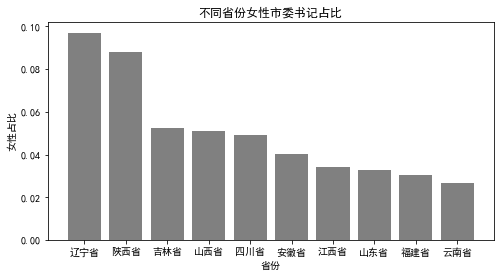

In [67]:
plt.rcParams['font.sans-serif'] = ['SimHei']# 解决matplotlib中文乱码问题,只在Windows下可以
fig_q1_1 = plt.figure(figsize=(8,4))
plt.bar(range(10),pt2['女性占比'][:10],tick_label=pt2.index[:10],color='gray')
plt.title('不同省份女性市委书记占比')
plt.xlabel('省份')
plt.ylabel('女性占比')
plt.show()

## 问题一 性别构成

data.unique()表示显示数据的唯一值内容

年龄情况：整体年龄分布 / 入职年龄分布 / 卸任年龄分布

新建变量 data_age，赋值包括年份、出生年份字段内容
清除缺失值

计算出整体年龄数据

计算出入职年龄数据

计算出卸任年龄数据

In [74]:
data_age = data[['出生年份','党委书记姓名','年份']]
data_age_notnull = data_age[data_age['出生年份'].notnull()]
print(data_age_notnull.head())
print(data_age_notnull['出生年份'].unique())
print(data_age_notnull.describe())



       出生年份 党委书记姓名    年份
121  1945.0    侯伍杰  2000
122  1945.0    侯伍杰  2001
123  1950.0    云公民  2002
124  1950.0    云公民  2003
125  1950.0    云公民  2004
[1945. 1950. 1956. 1949. 1952. 1957. 1953. 1960. 1955. 1951. 1954. 1948.
 1947. 1946. 1944. 1962. 1964. 1942. 1963. 1958. 1965. 1943. 1961. 1959.
 1941. 1966.]
              出生年份           年份
count  2676.000000  2676.000000
mean   1953.622571  2005.214499
std       4.416316     3.046486
min    1941.000000  2000.000000
25%    1951.000000  2003.000000
50%    1954.000000  2005.000000
75%    1956.000000  2008.000000
max    1966.000000  2010.000000
